# 15. 머신러닝 예측분석 연습

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics
import os

In [4]:
os.chdir('C:\\Users\\user\\Documents\\GitHub\\Doit_Python\\Data')
os.getcwd()

'C:\\Users\\user\\Documents\\GitHub\\Doit_Python\\Data'

In [5]:
df_raw = pd.read_csv('adult.csv')
df = df_raw.copy()
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [9]:
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts()

low     37155
high    11687
Name: income, dtype: int64

In [10]:
df['income'].value_counts(normalize = True)

low     0.760718
high    0.239282
Name: income, dtype: float64

In [11]:
df = df.drop(columns = 'fnlwgt')

In [13]:
target = df['income']
df = df.drop(columns = 'income')
df = pd.get_dummies(df)
df['income'] = target
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  uint8 
 6    workclass_Federal-gov                      48842 non-null  uint8 
 7    workclass_Local-gov                        48842 non-null  uint8 
 8    workclass_Never-worked                     48842 non-null  uint8 
 9    workclass_Private                          48842 non-null  uint8 
 10   workclass_Self-emp-i

In [17]:
df[['sex_Female', 'sex_Male']]

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,0,1


In [18]:
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,
                                     stratify = df['income'],
                                     random_state = 1234)

In [21]:
df_train.shape

(34189, 108)

In [22]:
df_test.shape

(14653, 108)

In [23]:
from sklearn import tree

In [25]:
clf = tree.DecisionTreeClassifier(random_state = 1234, 
                                   max_depth = 3)

In [26]:
train_x = df_train.drop(columns = 'income')
train_y = df_train['income']

In [27]:
model = clf.fit(X = train_x, y = train_y)

In [49]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',
                     'figure.figsize' : [12, 8]})

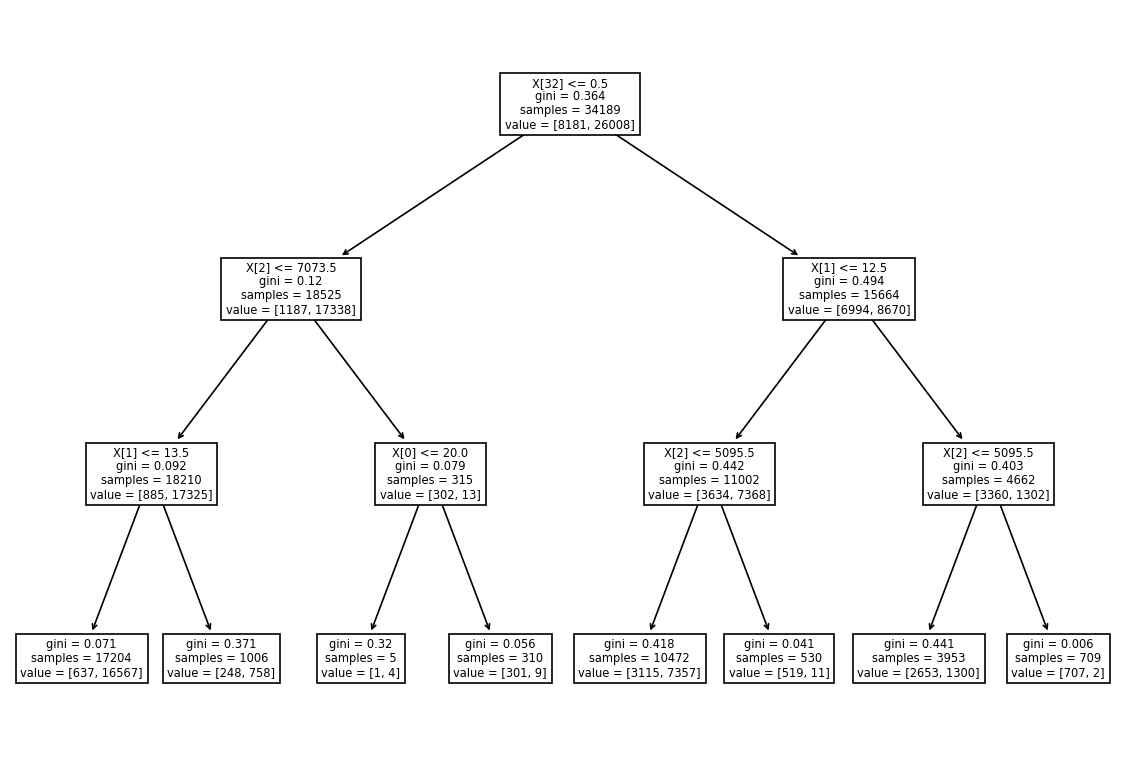

In [50]:
tree.plot_tree(model);

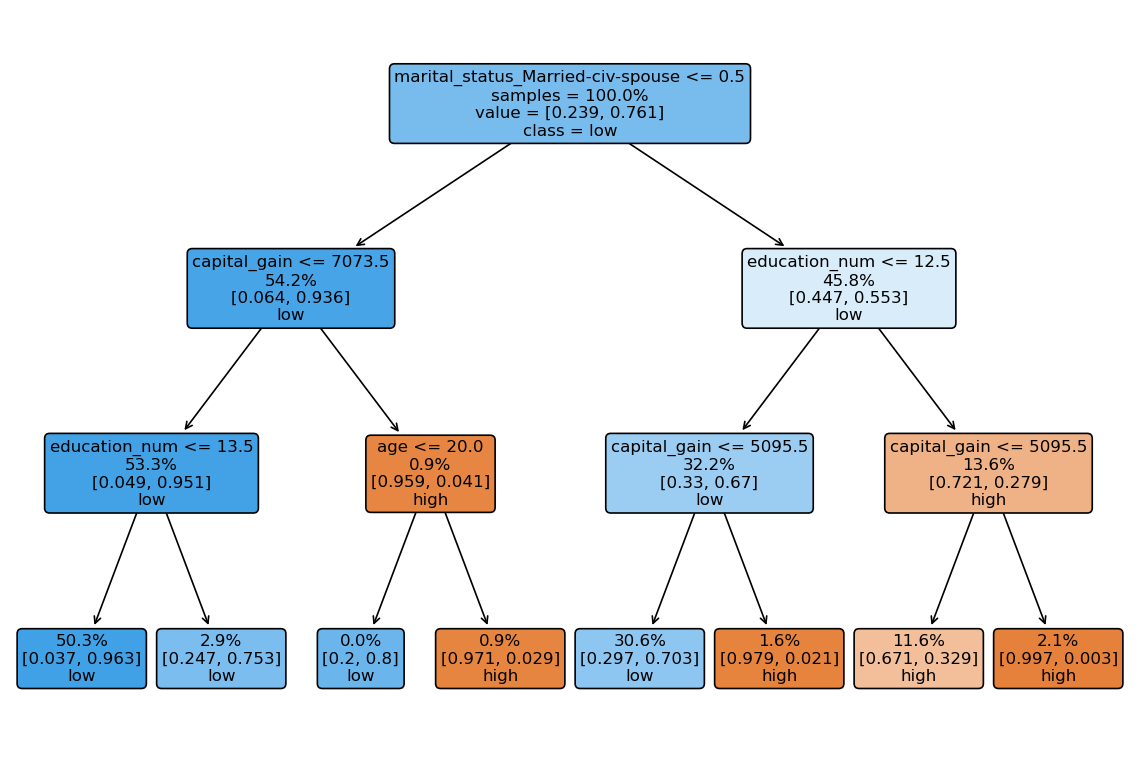

In [34]:
tree.plot_tree(model,
               feature_names = train_x.columns,
               class_names = ['high', 'low'],
               proportion = True,
               filled = True,
               rounded = True,
               impurity = False,
               label = 'root',
               fontsize = 10);

In [36]:
test_x = df_test.drop(columns = 'income')
test_y = df_test['income']

In [38]:
df_test['pred'] = model.predict(test_x)
df_test.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
conf_mat = confusion_matrix(y_true = df_test['income'],
                            y_pred = df_test['pred'],
                            labels = ['high', 'low'])
conf_mat

array([[ 1801,  1705],
       [  582, 10565]], dtype=int64)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

In [52]:
plt.style.use('default')

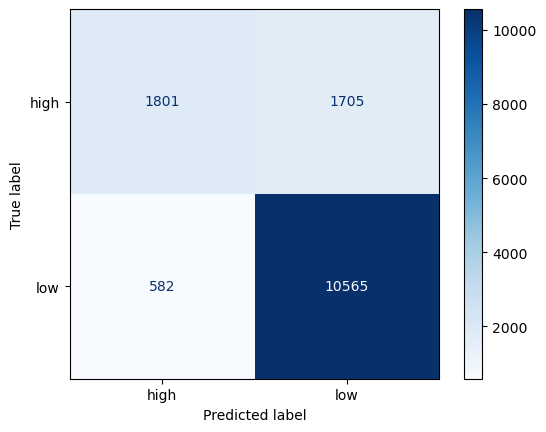

In [53]:
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                           display_labels = ('high', 'low'))
p.plot(cmap = 'Blues');

In [54]:
import sklearn.metrics as metrics

In [55]:
metrics.accuracy_score(y_true = df_test['income'],
                       y_pred = df_test['pred'])

0.8439227461953184

In [57]:
metrics.precision_score(y_true = df_test['income'],
                        y_pred = df_test['pred'],
                        pos_label = 'high')

0.7557700377675199

In [60]:
metrics.recall_score(y_true = df_test['income'],
                     y_pred = df_test['pred'],
                     pos_label = 'high')

0.5136908157444381

In [61]:
metrics.f1_score(y_true = df_test['income'],
                 y_pred = df_test['pred'],
                 pos_label = 'high')

0.6116488368143997